### Statistics pre-note

- **Descriptive statistics:** Summarize data - mean, median, mode, standard deviation, variance, range, percentiles

- **Inferential statistics:** Inferences concluded about an entire population based on a sample.  It is not always possible to get or process the entire universe of data, and especially important for machine learning, where we try to model the relationship with known variables to make a prediction on future or unseen data.
<br>Examples in Python [here](https://pythonfordatascience.org/descriptive-statistics-python/).

## Statistical Power, Hypothesis testing, p-values - why should we care? 
##### (one of many good references here https://www.statisticsdonewrong.com/introduction.html)
- As scientists, we want our findings in data to be meaningful 
- Real world data is usually noisy, biased, and/or incomplete
- The majority of the work we do is with understanding and exploring the data before the modeling happens
- a model is as useful as the data it was based off of, and for the potential use in predictions

Let's use a simple example to define and explain some of these concepts: flipping a coin ...

### Example: Flipping a coin
A fair coin would have:
- Probability of heads: $p_h$ = 0.5
- Probability of tails: $p_t$ = 0.5

Even if a coin is fair, heads would not necessarily occur half the time.  An experiment to test if a coin is fair is to flip the coin $N$ times, and count how many heads land out of the $N$. The process of flipping the coin, counting the heads is a trial.  When we run the trial many times, we can get a better idea of what generally happens. (Bootstrapping is another term used)

### Setting up the test
Generally statistical tests compare a sample of data from an entire population or compare two sets of data.

- Understand the distribution of what you are measuring to choose which statistical test to use.

> Flipping a coin follows a Binomial distribution 
$$ P(A) = \sum P(\{ (e_1,...,e_N) \})  =  {{N}\choose{k}} \cdot p^kq^{N-k}$$
$N$ is the number of trials, $p$ is the probability of success (heads), $k$ is the number of successes

> 0 (tail) with probability $p=1−q$

> 1 (head) with probability $q$


- Define the null and alternative hypothesis.  The null would be the "default" belief, and the alternative is what we want to test or prove.

> Null Hypothesis: $H_o$ Coin is fair <br>
> Alternative Hypothesis: $H_a$ Coin is not fair, Heads more likely, Tails more likely

- Calculate the test statistic.
> In this case, we can use the T-test, aka Student’s t-Test.  
$t = \frac{\mu1 - \mu2}{/ \sqrt{(\frac{s1}{N1}+\frac{s2}{N2})}}$ <br><br>
> $N_1$:Number of trials in dataset 1<br>
> $N_2$:Number of trials in dataset 2<br>
> $s_1$:standard deviation of dataset 1<br>
> $s_2$:standard deviation of dataset 2<br>
> $\mu1$:mean of dataset 1<br>
> $\mu2$:mean of dataset 2<br>
<br>
This conditions to use this test are:
- normal distribution of the data
> For a sufficiently large $N$, or number of trials, a normal distribution is a good approximation for the binomial distribution.  
- the two datasets are independent of each other (or randomly sampled with replacement when drawing samples from a population)
- The variances is unknown (typical of real life) <br>
> For this example, we will assume that we do not know the variance.



- [p-value](https://www.statsdirect.com/help/basics/p_values.htm) (or significance value, is the probability of observing the metric from the data at least as extreme as computed just by chance).  The significance levels that are normally used are 1% and 5%. For a p-value of 5%, 95% is then the confidence interval. (more on this in lecture or this notebook)


For this example, I will find out what the critical values are.  That is, how many more more heads out of a number of flips and trials do we need to get for it to be a significant difference.  Next is performing a t-test to confirm this by calculating the p-value.


In [15]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.power import TTestIndPower
%matplotlib inline

(array([   1.,   15.,   53.,  110.,  195.,  243.,  217.,  118.,   42.,    6.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

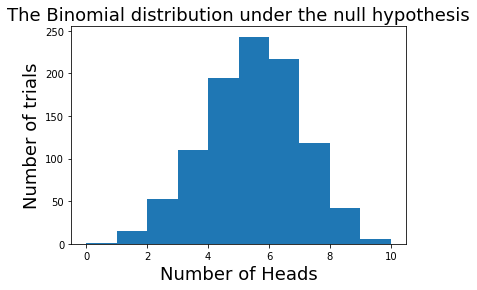

In [16]:
#Generating data for a fair coin
n, p = 10, .5  # number of trials, probability of each trial 
#numpy function to generate data of binomial trials
N=1000
s1 = np.random.binomial(n, p, N) # result of flipping a coin 10 times, tested 100 times 
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Number of trials",fontsize=18)
plt.title("The Binomial distribution under the null hypothesis",fontsize=18)
plt.hist(s1)

[Test for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/), two ways are using a QQ plot (other ways are Kolmogorov-Smirnov test, Jarque–Bera test). 

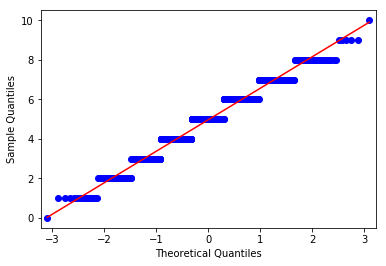

In [17]:
#one of the options to check for normality
qqplot(s1, line='s')
plt.show()
#normality will get "better" as the number of trials increases

Text(0.5,1,'The Binomial probability mass function under the null hypothesis')

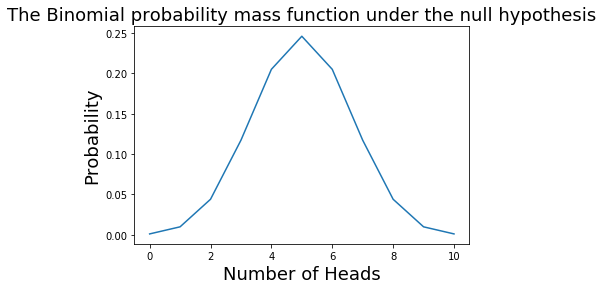

In [18]:
#for n=10 flips, what is the distribution assuming the null hypothesis, that is, the coin is fair?
pmf = stats.binom.pmf(range(n+1),n=n,p=0.5)
#plt.figure(figsize=(12,8))
plt.plot(range(n+1),pmf)
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("The Binomial probability mass function under the null hypothesis",fontsize=18)

#### One-tailed test v.s. Two-tailed test
Also known as one or two sided tests.  
- *Two tailed test:*  Tests the hypothesis for either direction.  In this case, does the coin flip more heads OR more tails than a fair coin?  The two tailed halves the p-value to testing statistical significance in both direction. 
- *One tailed test:* Tests the hypothesis in one direction.  Does the coin flip more heads?  Does the coin flip more tails?  The one tailed uses the p-value to test statistical significance in one direction or the other. 


Reject null hypothesis if number of heads is more than 8.0
Reject null hypothesis if number of heads is less than 2.0
Reject null hypothesis if number of heads lies outside 1.0 and 9.0


Text(0.5,1,'The Binomial distribution and the critical regions for the 1 sided test')

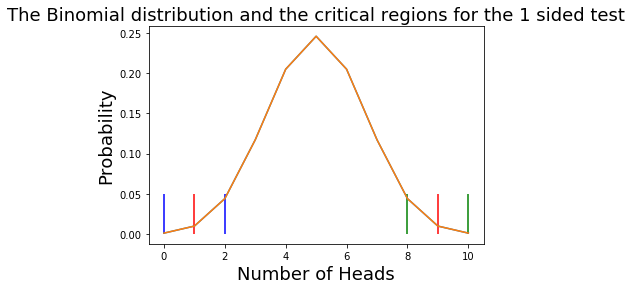

In [19]:
#what is the critical value (how many heads?) for the coin to be significantly unfair for n
p_value=0.05

#one-tailed test p > 0.5":
k=stats.binom.ppf(1-p_value,n=n,p=0.5)
print("Reject null hypothesis if number of heads is more than {}".format(k))
#one-tailed test p < 0.5":
k = stats.binom.ppf(p_value,n=n,p=0.5)-1
print("Reject null hypothesis if number of heads is less than {}".format(k+1))
#two-tailed test p ≠ 0
k1 = stats.binom.ppf(1-p_value/2,n=n,p=0.5)+1
k2 = stats.binom.ppf(p_value/2,n=n,p=0.5)-1
print("Reject null hypothesis if number of heads lies outside {} and {}".format(k2,k1))


#plt.figure(figsize=(12,8))
plt.plot(range(n+1),pmf)
plt.vlines([k2, k1], 0.0,0.05, colors='r')
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("The Binomial distribution and the critical regions",fontsize=18)
plt.plot(range(n+1),pmf)
plt.vlines([0, 2], 0.0,0.05, colors='b')
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Probability",fontsize=18)
#plt.title("The Binomial distribution and the critical regions for the 1 sided test",fontsize=18)
k=stats.binom.ppf(1-p_value,n=n,p=0.5)

plt.vlines([k, 10], 0.0,0.05, colors='g')
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("The Binomial distribution and the critical regions for the 1 sided test",fontsize=18)

From these results, if a coin has a probability flipping heads at least 61/100, or $p_H=.61$ we are in a critical region. 


(array([   1.,    8.,   23.,   92.,  175.,  235.,  266.,  137.,   51.,   12.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

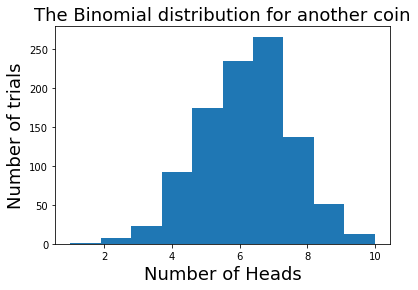

In [20]:
#Generating data for a different coin, one that flips heads 60% of the time
n, p = 10, .62  # number of trials, probability of each trial 
#numpy function to generate data of binomial trials
N=1000
s2 = np.random.binomial(n, p, N) # result of flipping a coin 10 times, tested 10000 times 
plt.xlabel("Number of Heads",fontsize=18)
plt.ylabel("Number of trials",fontsize=18)
plt.title("The Binomial distribution for another coin",fontsize=18)
plt.hist(s2)

In [21]:

##  scipy function to do all of the behind the scenes for a 2 tailed test
t2, p2 = stats.ttest_ind(s1,s2)
print("t-score = " + str(t2))
print("p-value = " + str(2*p2))


t-score = -18.8356558449
p-value = 1.11431382681e-72


As expected, our result is a p-value of 5.1e-62, much lower than 0.05.  Therefore we can reject the null hypothesis and say the alternate hypothesis is statistically significant.


#### [Power of a test](https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/)
(The power of a hypothesis test is 1 minus the probability of a Type II error. Basically the power of a test is the probability that we make the right decision when the null is not correct (i.e. we correctly reject it).

- Type 1 error: (Rejecting null hypothesis when it is true). Also called false positive.
- Type 2 error: (Failing to reject null hypothesis when it is false). Also called false negative


From the critical values calculated above, incorrectly failing to reject the null happens if a sample mean that is less than 1.0 or greater than 9.0 is drawn

We need to determine 4 things:
1. significance level
2. effect size
3. power
4. sample size

These can be determined and all 4 are related to each other. In our experiment, we already decided a significance level, and sample size. So we could calculate power based on some values of effect size.  Below, I use code from [here](https://github.com/erykml/bux_articles/blob/master/power_analysis.ipynb), to show how power varies as sample size varies for a significance value of 0.05 and three effect sizes from [Cohn's D](https://en.wikipedia.org/wiki/Effect_size#Cohen%27s_d) -> difference between two means divided by a standard deviation for the data.

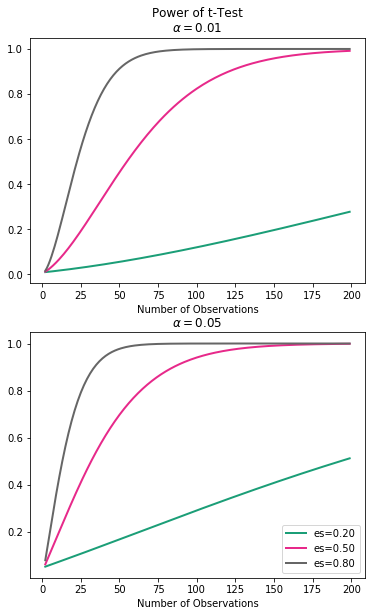

In [22]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)

### Testing the significance of more than 2 results - [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) (Analysis of Variance)
One-way (ANOVA) is used to find if there is any statistically significant differences between the means of three or more independent groups.
Data:  Results of three different diets (download from [here](https://www.sheffield.ac.uk/mash/data)).  Each row is data on each person who went on a diet, thier age, gender, and height. The study was performed to decide which diet is the best for losing weight.

> Null Hypothesis: $H_o$ There is no difference in the diets <br>
> Alternative Hypothesis: $H_a$ At least 2 of the diets are significantly different



In [1]:
diet_pd=pd.read_csv("data/stcp-Rdataset-Diet.csv")
diet_pd.head()

NameError: name 'pd' is not defined

In [3]:
diet_pd['weight.loss']=diet_pd['pre.weight']-diet_pd['weight6weeks']
#diet_pd.dtypes
diet_pd.groupby('Diet').size()

NameError: name 'diet_pd' is not defined

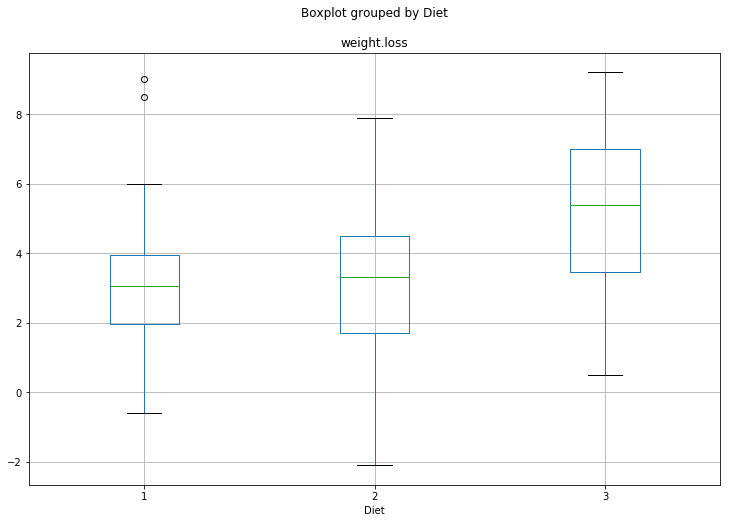

In [25]:
#Create a boxplot to visually see a difference
diet_pd.boxplot('weight.loss', by='Diet', figsize=(12, 8))


In [26]:
diet1_pd=diet_pd[diet_pd['Diet'] == 1]
diet2_pd=diet_pd[diet_pd['Diet'] == 2]
diet3_pd=diet_pd[diet_pd['Diet'] == 3]

stats.f_oneway(list(diet1_pd['weight.loss']), list(diet2_pd['weight.loss']), list(diet3_pd['weight.loss']))

F_onewayResult(statistic=6.1974474531653492, pvalue=0.0032290142385893524)

With this result, we accept the alternative hypothesis, that at least 2 of the diets are significantly different.
#### Assignment 
perform 2 sample tests to find out which diet is the most effective

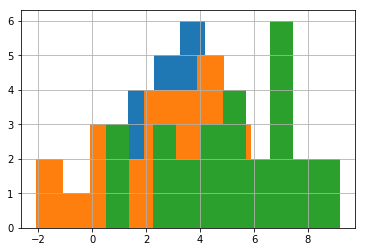

In [27]:
diet1_pd['weight.loss'].hist()
diet2_pd['weight.loss'].hist()
diet3_pd['weight.loss'].hist()

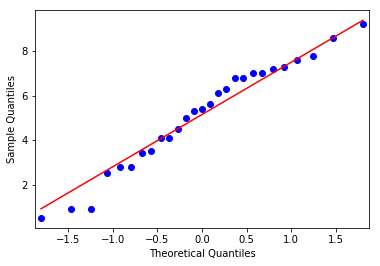

In [28]:
qqplot(diet3_pd['weight.loss'], line='s')
plt.show()